# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
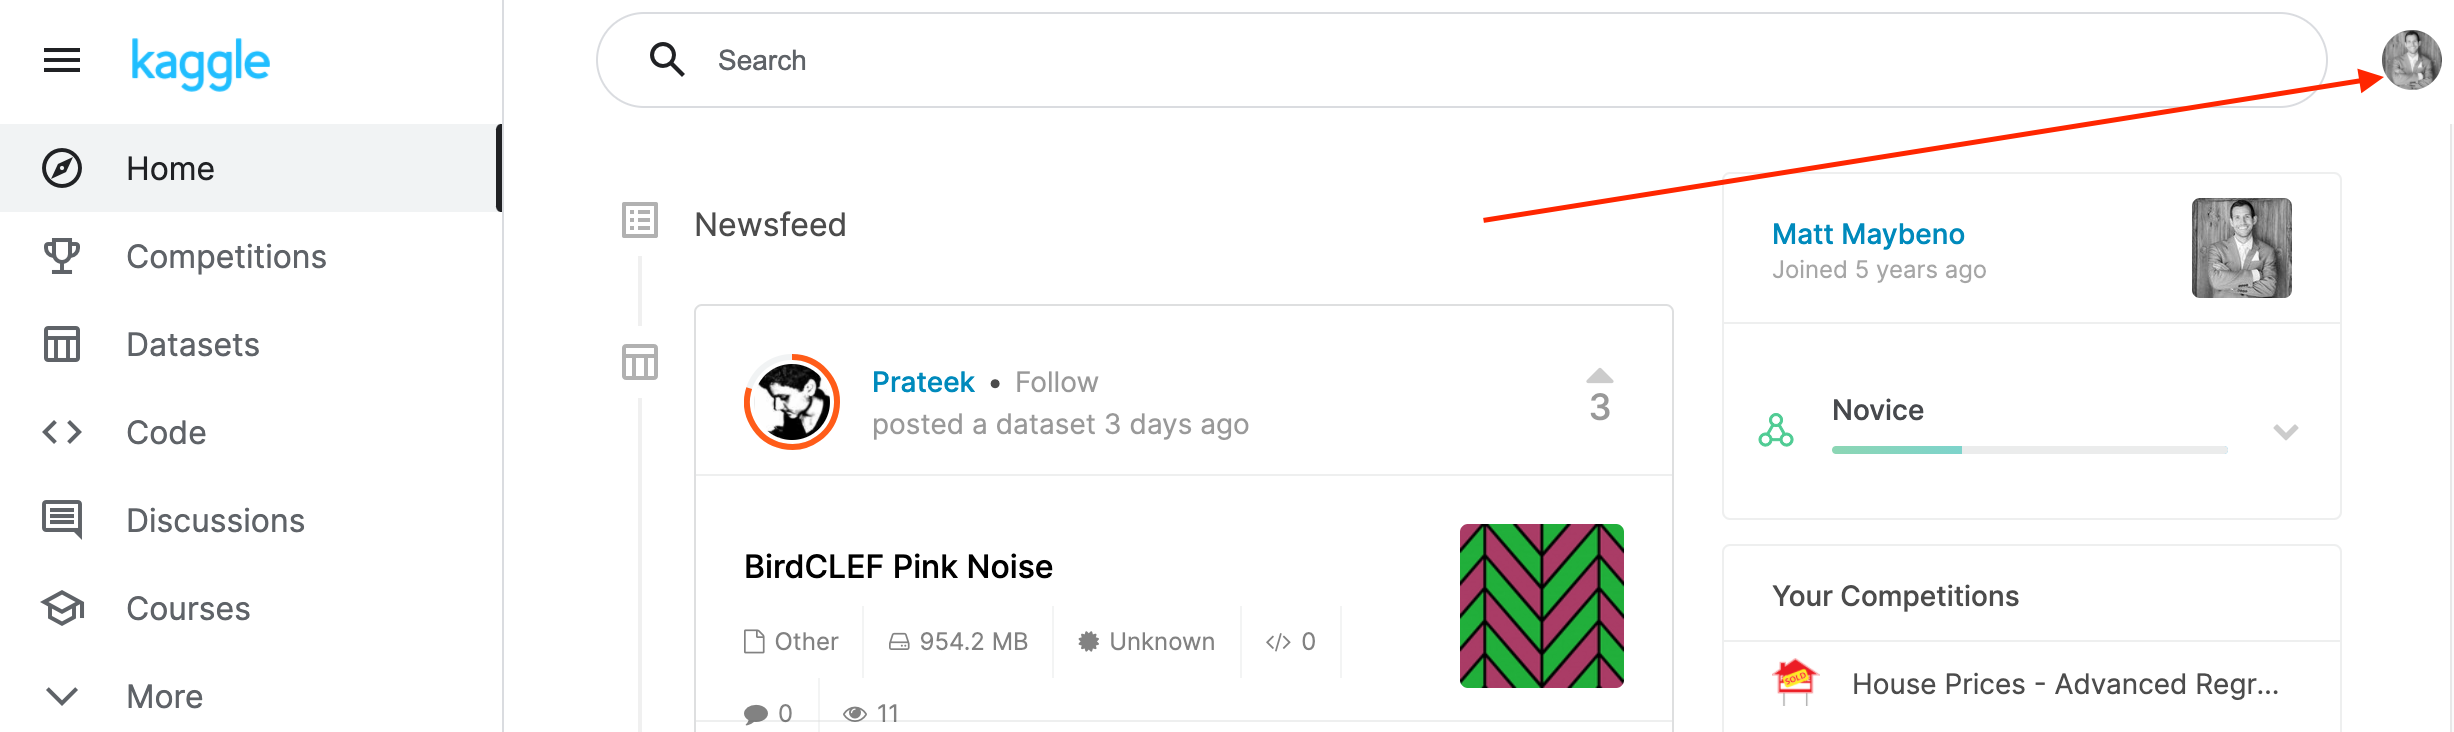
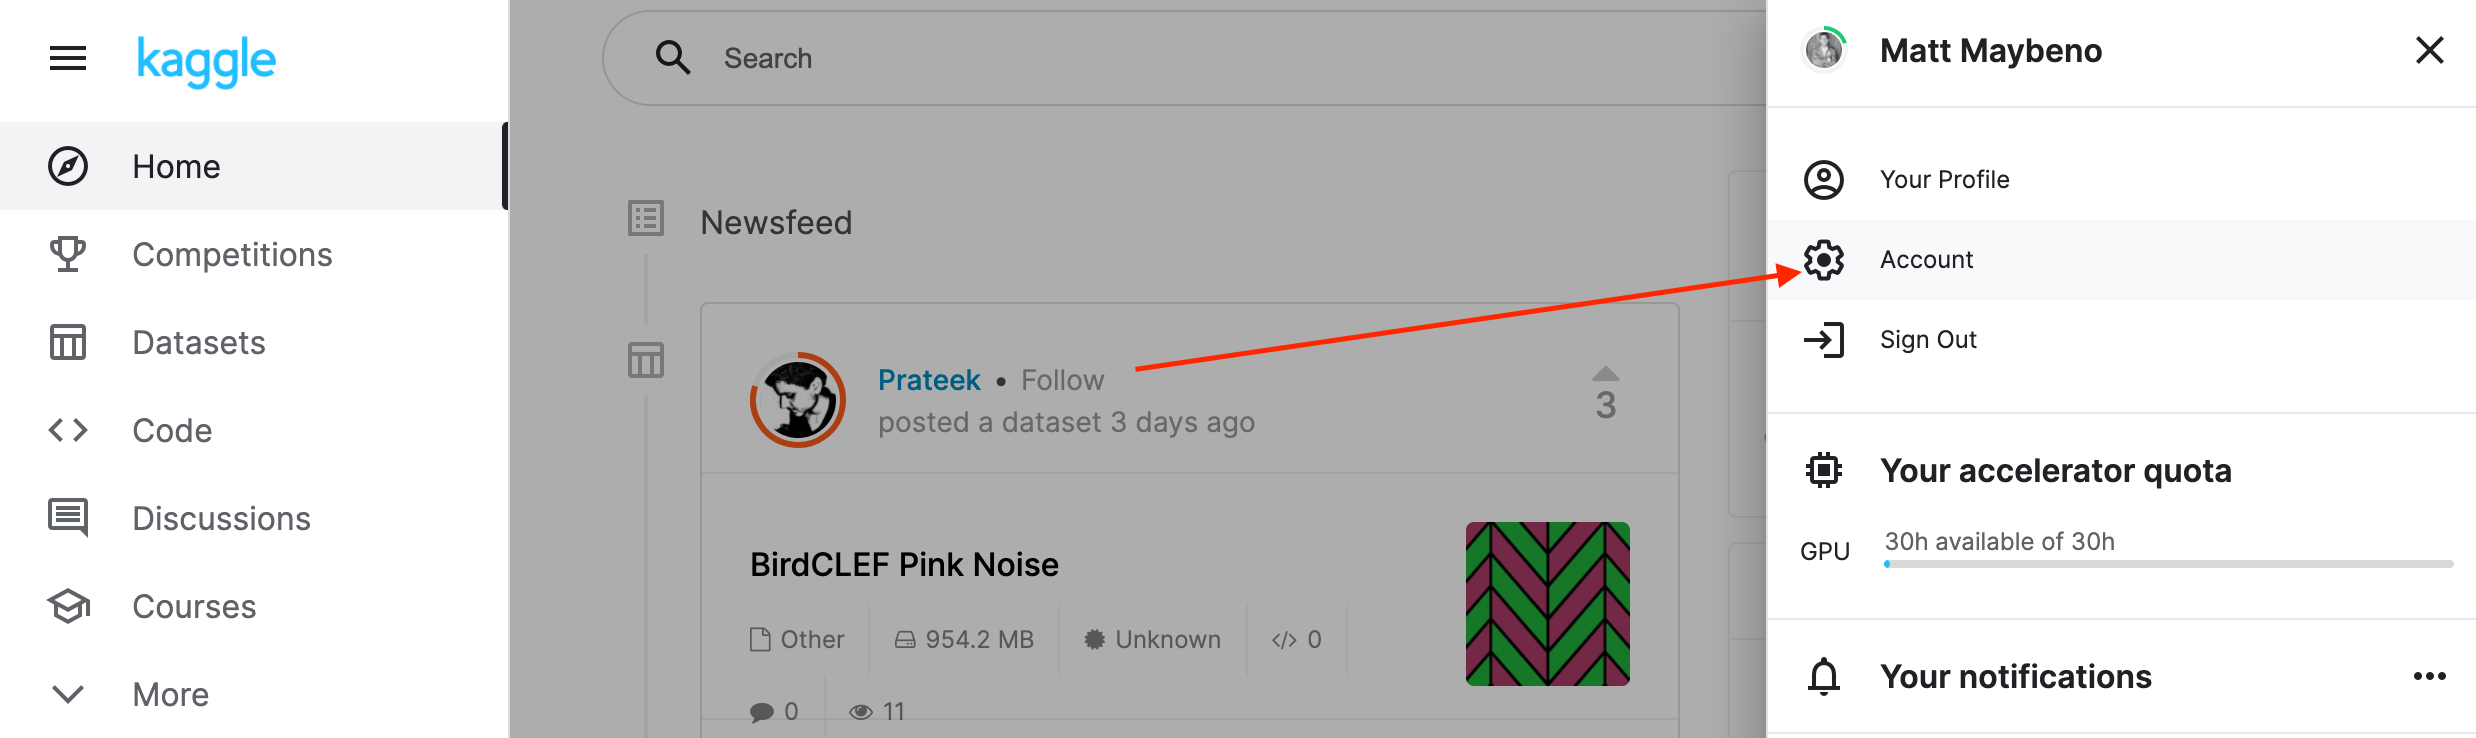
2. Scroll down to API and click Create New API Token.
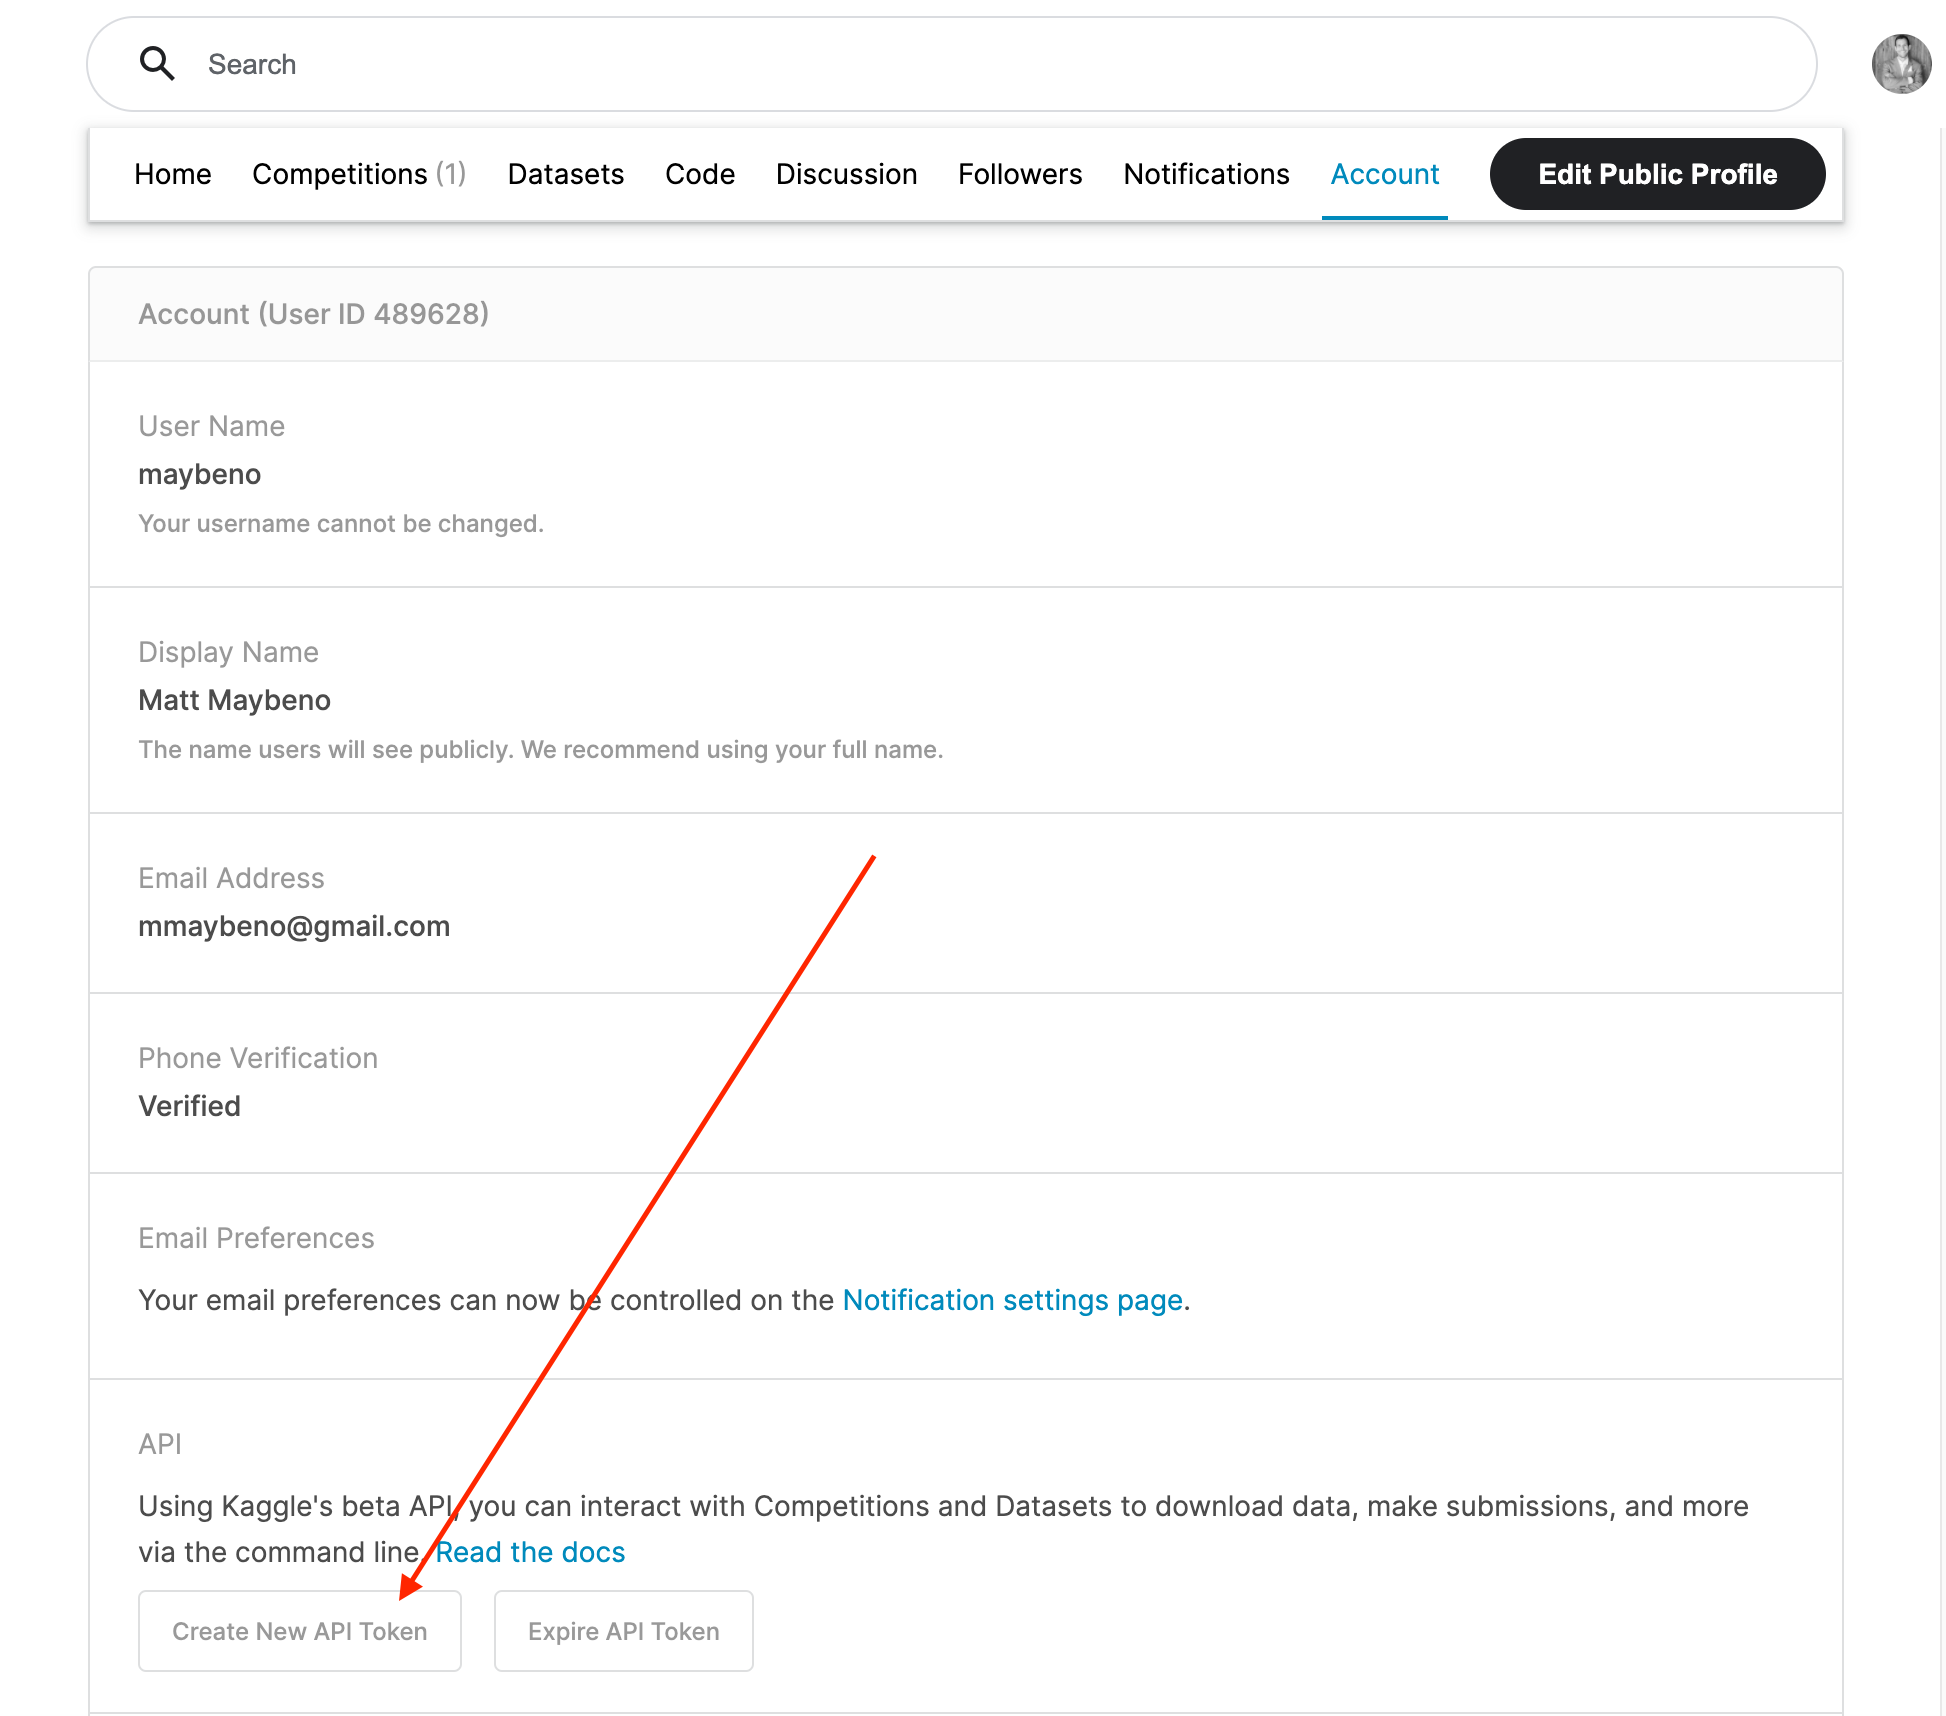
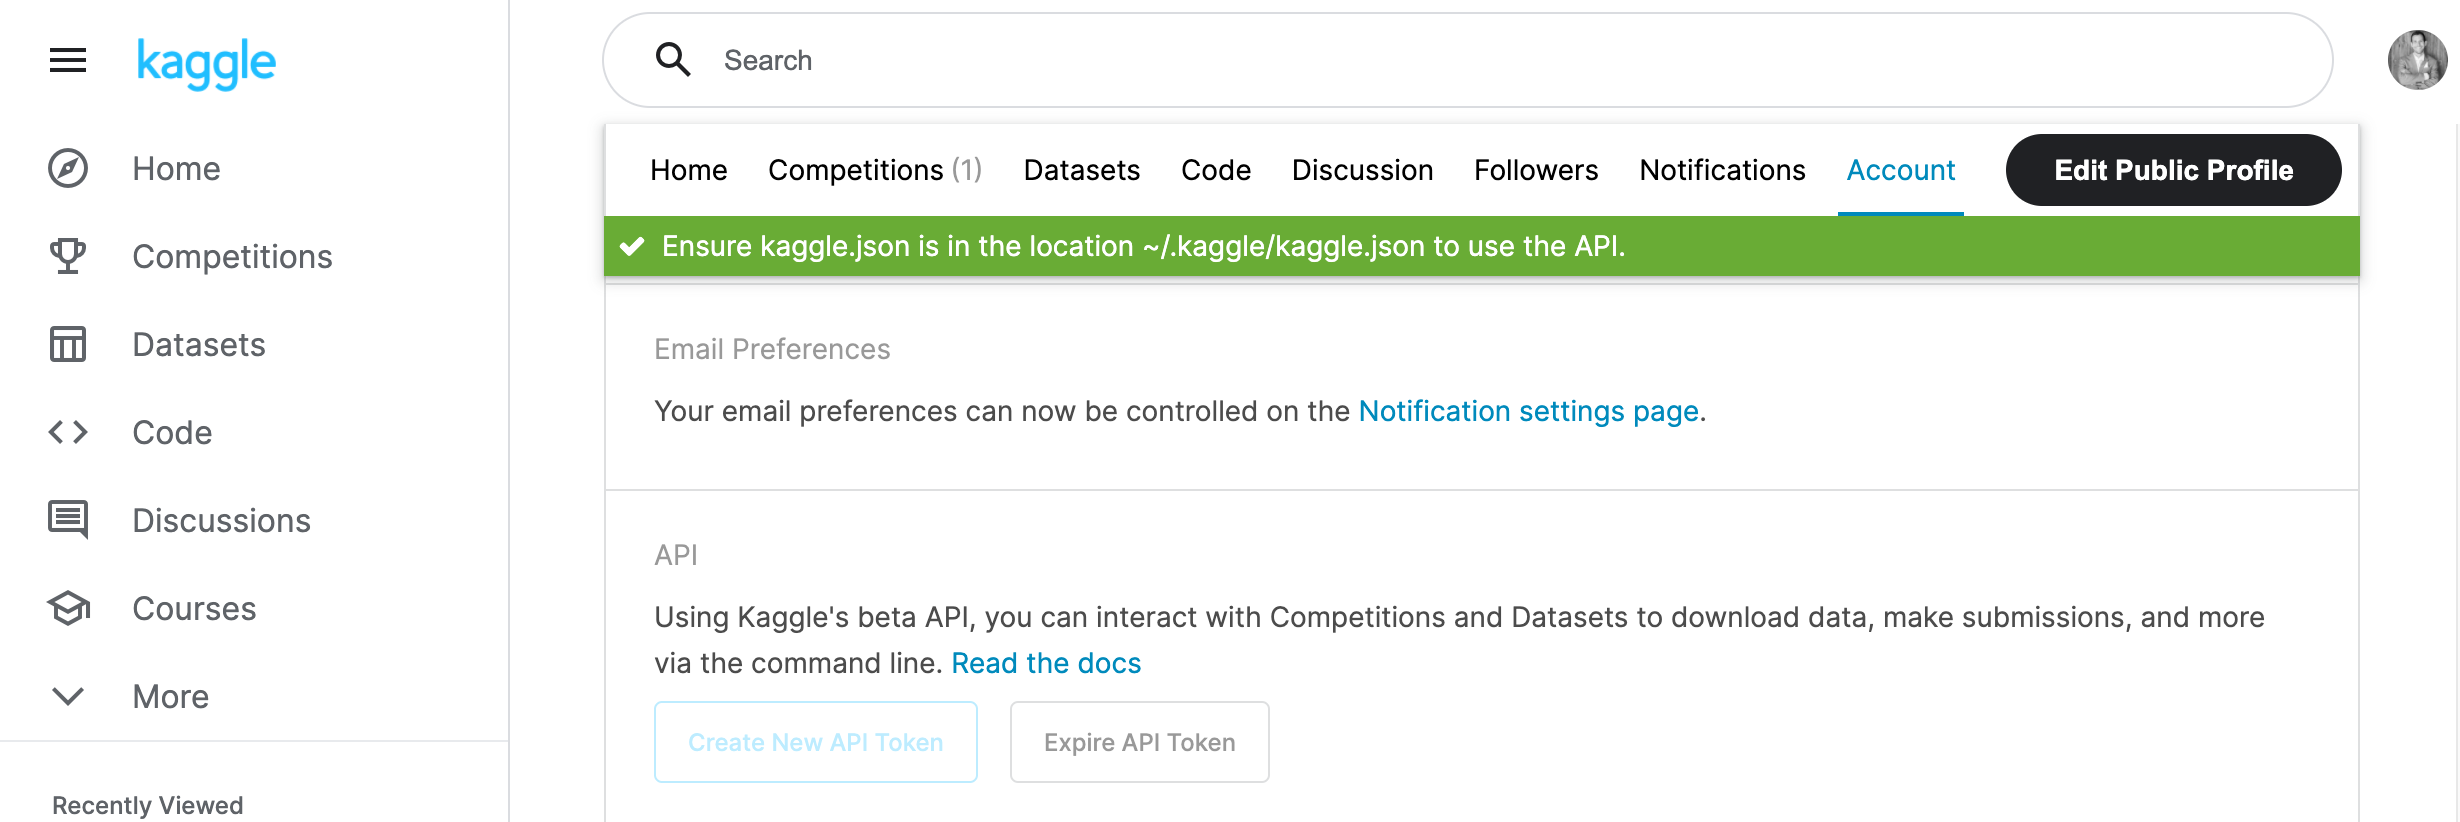
3. Open up `kaggle.json` and use the username and key.
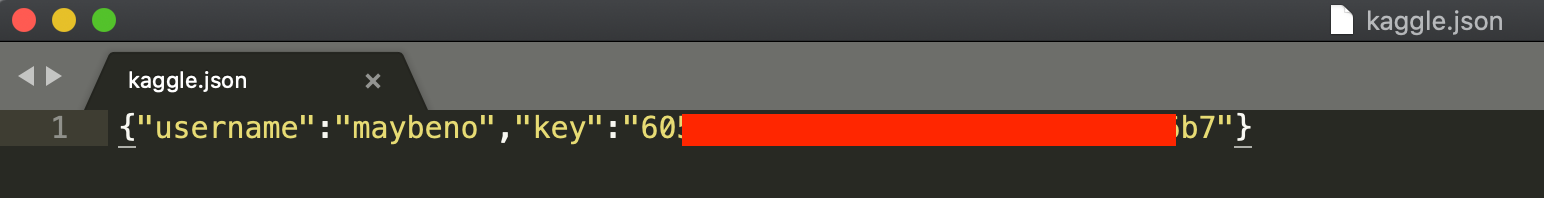

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
  Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-69.0.2-py3-none-any.whl (819 kB)
Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-

### Setup Kaggle API Key

In [3]:
pip install kaggle

  Using cached kaggle-1.5.16-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [242]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "stevensilvestre23"
kaggle_key = "8bd1b89ed8c2275abad5c02376ff0641"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
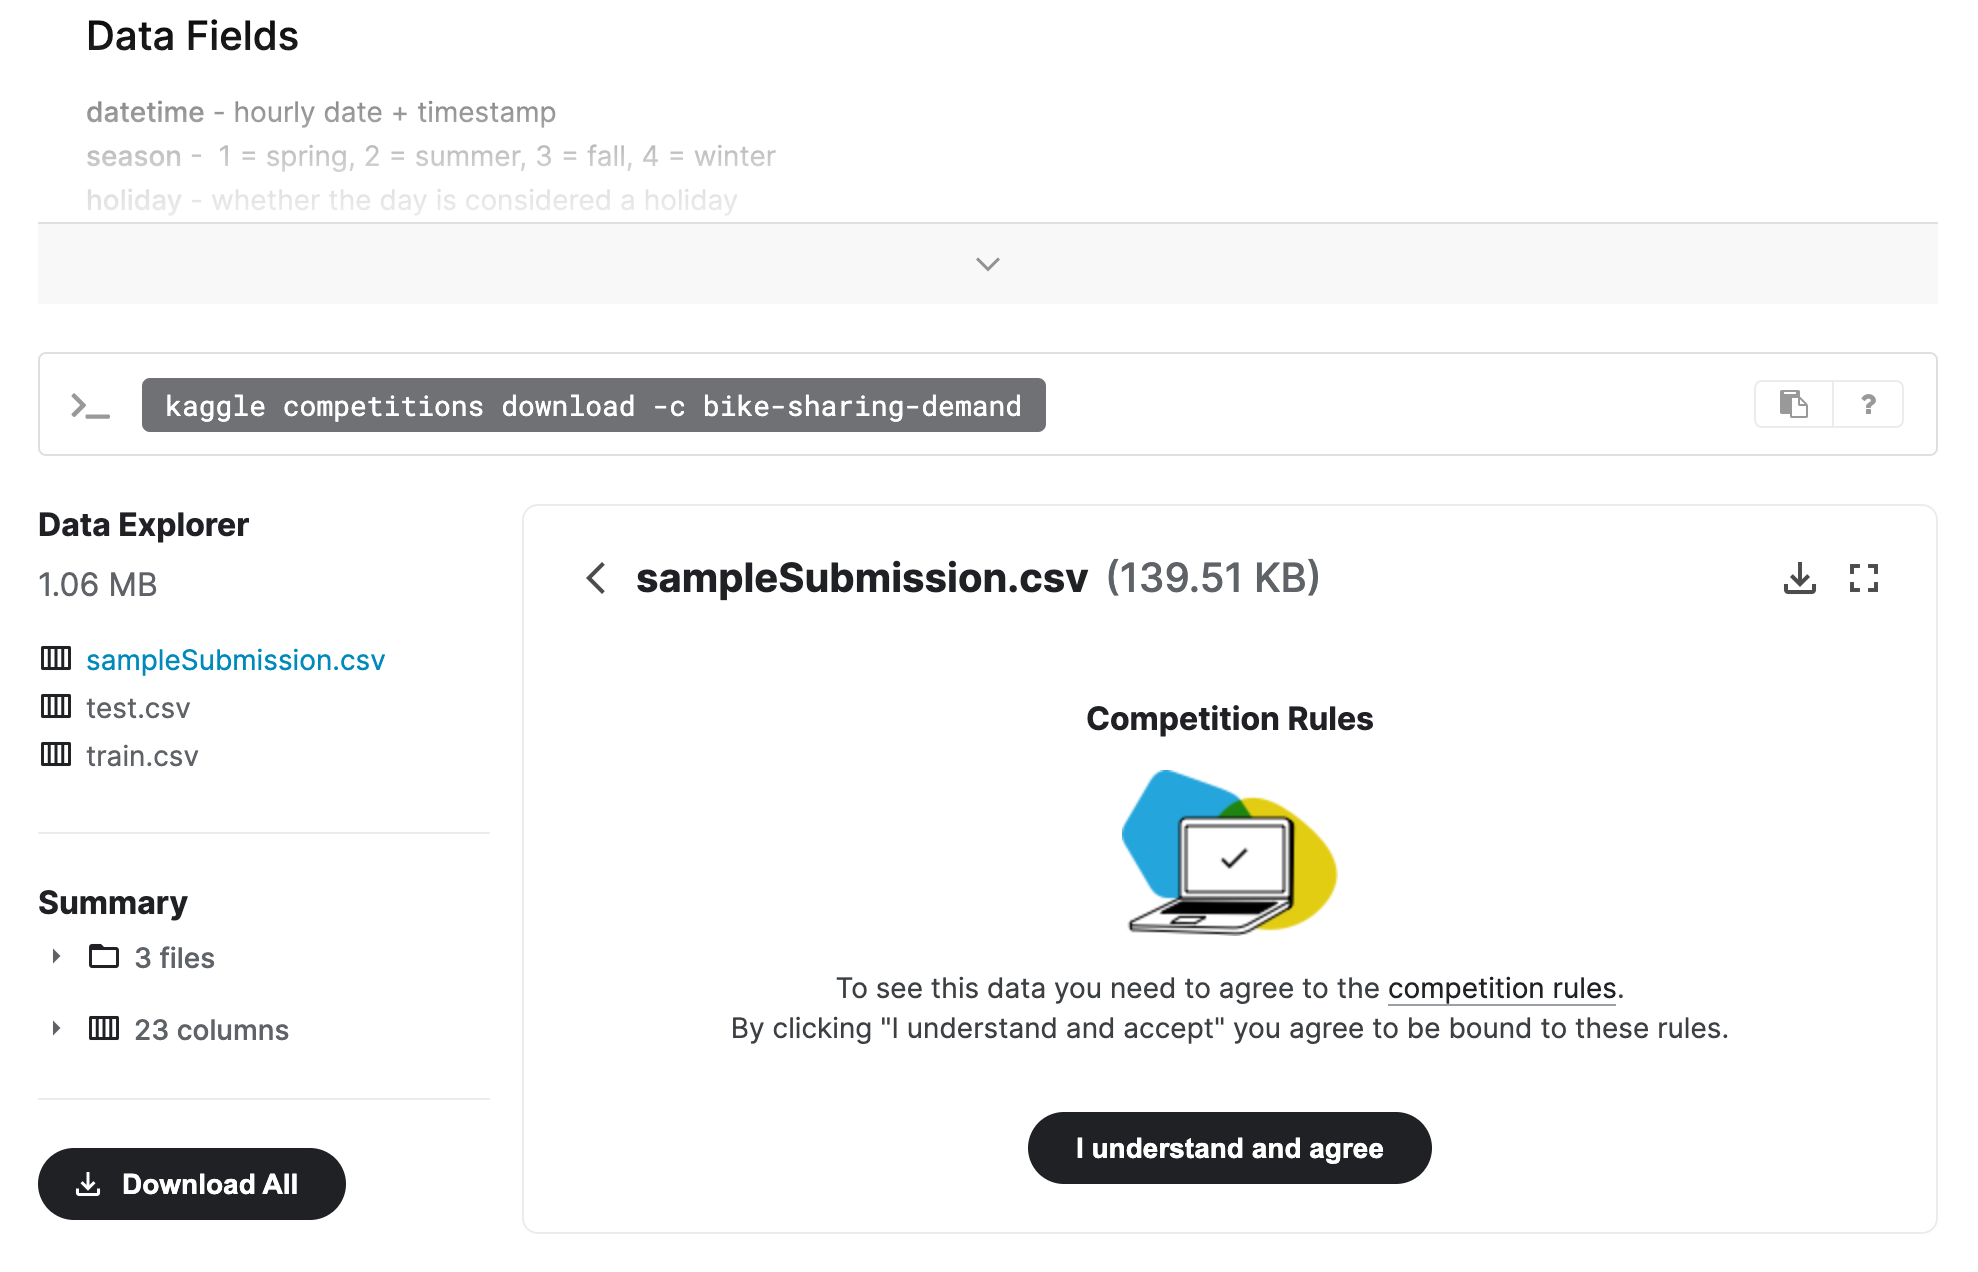

In [13]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 5.71MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [109]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.loc[:,'datetime'] = pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.loc[:,'datetime'] = pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:,'datetime'] = pd.to_datetime(submission['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [250]:
predictor = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data = train.loc[:,~train.columns.isin(['casual','registered'])], 
    time_limit = 600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20231127_071322/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231127_071322/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sun Oct 22 17:17:17 UTC 2023
Disk Space Avail:   9223372028.68 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_

### Review AutoGluon's training run with ranking of models that did the best.

In [291]:
predictor.info()['model_info'][best_model]['hyperparameters']

{'use_orig_features': False,
 'max_base_models': 25,
 'max_base_models_per_type': 5,
 'save_bag_folds': True}

In [292]:
#predictor.fit_summary()
leaderboard = predictor.leaderboard(silent=True)
leaderboard

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-52.832456,17.247265,565.811268,0.000836,0.295892,3,True,14
1,RandomForestMSE_BAG_L2,-53.121309,13.279965,429.246179,0.752247,32.280587,2,True,12
2,LightGBM_BAG_L2,-54.753380,12.788844,422.554064,0.261126,25.588472,2,True,11
3,CatBoost_BAG_L2,-55.583684,12.580938,447.982415,0.053219,51.016823,2,True,13
4,LightGBMXT_BAG_L2,-60.205071,16.179837,456.629495,3.652119,59.663903,2,True,10
5,KNeighborsDist_BAG_L1,-84.142866,0.090670,0.032131,0.090670,0.032131,1,True,2
6,WeightedEnsemble_L2,-84.142866,0.091610,0.527920,0.000941,0.495790,2,True,9
7,KNeighborsUnif_BAG_L1,-101.581543,0.061375,0.842062,0.061375,0.842062,1,True,1
8,RandomForestMSE_BAG_L1,-116.544294,0.595574,11.826814,0.595574,11.826814,1,True,5
9,ExtraTreesMSE_BAG_L1,-124.588053,0.546322,5.986640,0.546322,5.986640,1,True,7


### Create predictions from test dataset

In [252]:
predictions = predictor.predict(test)
predictions.head()

0    23.697287
1    41.582237
2    46.902008
3    49.772480
4    52.160515
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [253]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.133644
std        89.407814
min         3.098086
25%        19.801714
50%        63.553146
75%       165.901855
max       360.752319
Name: count, dtype: float64

In [254]:
# How many negative values do we have?
predictions[predictions<0]

Series([], Name: count, dtype: float32)

In [255]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 276kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-11-26 04:34:27  first raw submission  complete  1.79937      1.79937       


#### Initial score of `1.79937`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

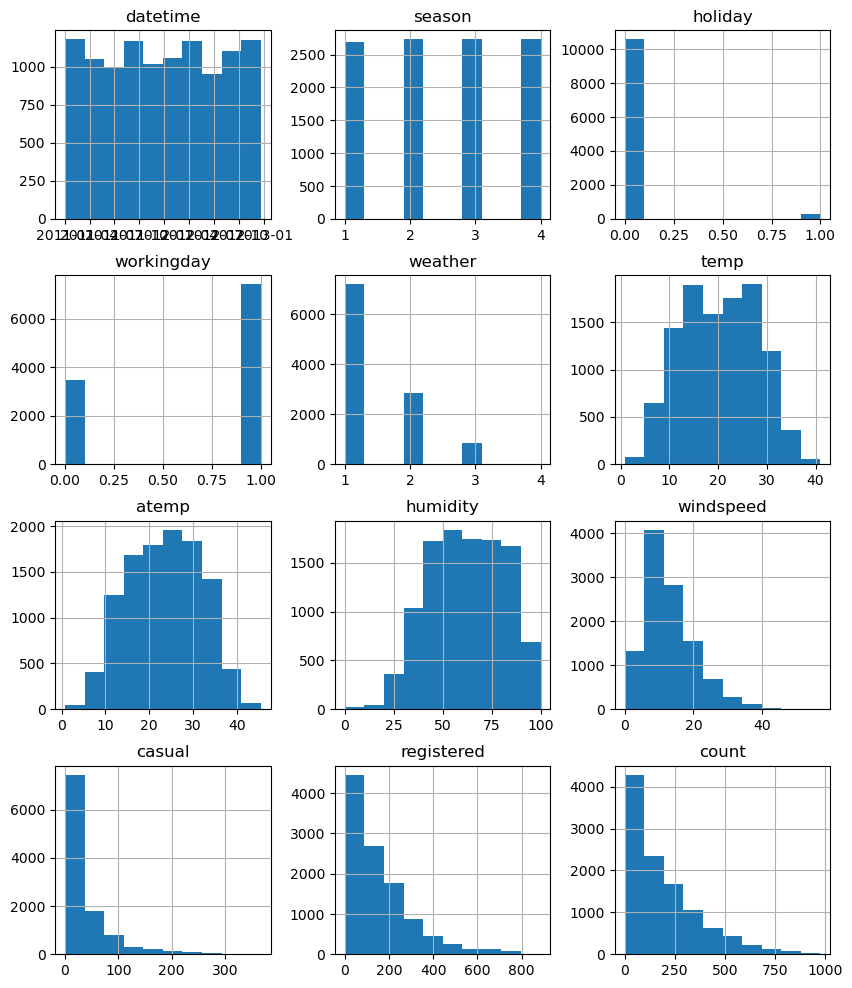

In [11]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(10,12))
plt.show()

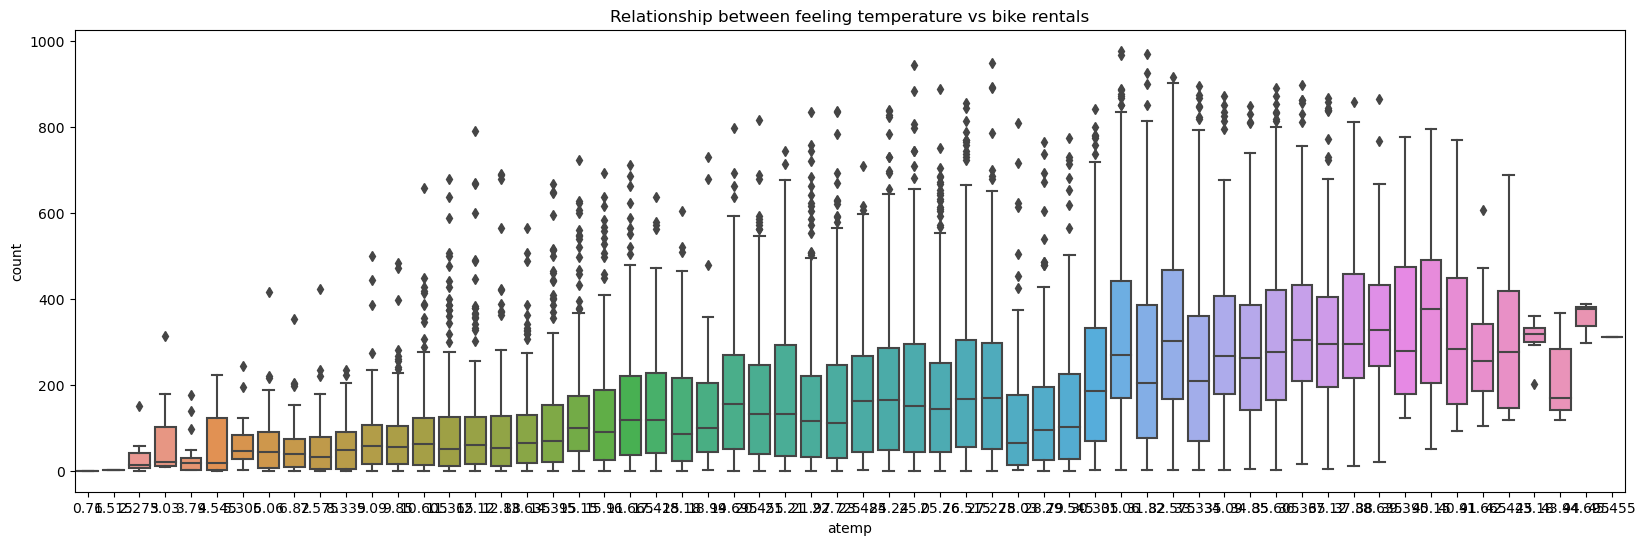

In [106]:
plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='count', data=train)
plt.title('Relationship between feeling temperature vs bike rentals')
plt.show()

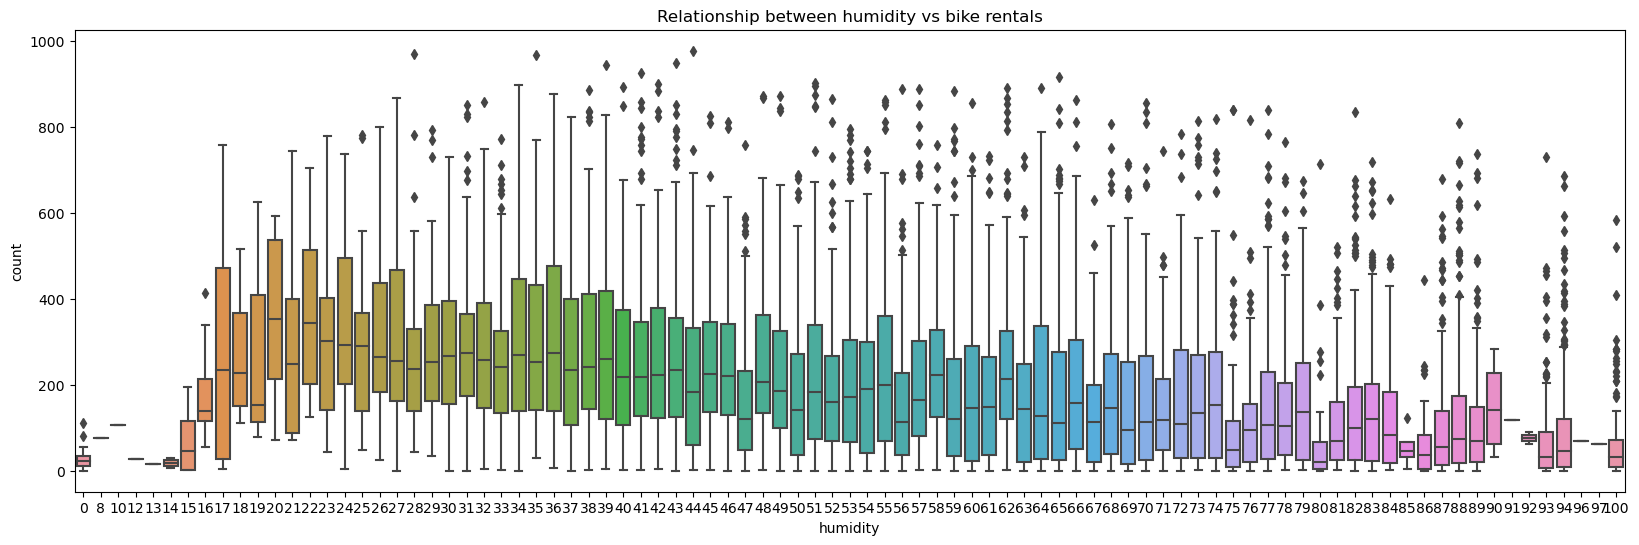

In [114]:
plt.figure(figsize=(20,6))
sns.boxplot(x='humidity', y='count', data=train)
plt.title('Relationship between humidity vs bike rentals')
plt.show()

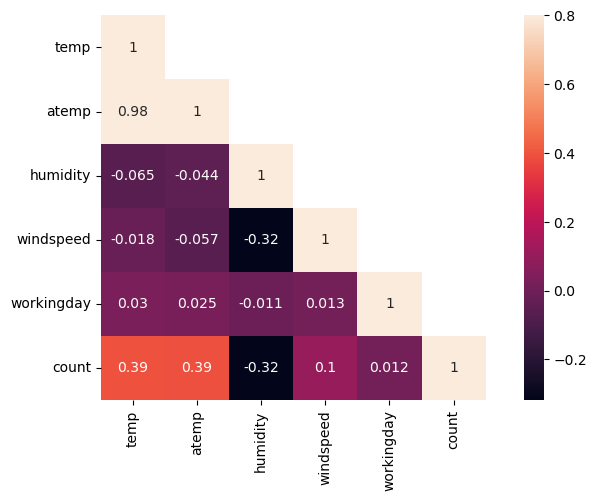

In [113]:
corrMatt = train[["temp","atemp","humidity","windspeed","workingday","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [12]:
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
test['hour'] = pd.to_datetime(test['datetime']).dt.hour

In [13]:
def categorize_rush_hour(hour):
    if 7 <= hour < 9:
        return 'morning rush'
    elif 11 <= hour < 13:
        return 'lunch rush'
    elif 17 <= hour < 19:
        return 'evening rush'
    else:
        return 'other'

# Assuming 'hour' is a column in your DataFrame representing the hour of the day
train['rush_hour_category'] = train['hour'].apply(categorize_rush_hour)
test['rush_hour_category'] = test['hour'].apply(categorize_rush_hour)

In [14]:
def categorize_temperature(temp):
    if temp < 10:  # Assuming temperature is in Celsius
        return 'cold'
    elif 10 <= temp < 25:
        return 'mild'
    else:
        return 'hot'

# Assuming 'temp' is a column in your DataFrame
train['temp_category'] = train['temp'].apply(categorize_temperature)
test['temp_category'] = test['temp'].apply(categorize_temperature)

In [15]:
def categorize_wind_speed(wind_speed):
    # Threshold for 'very windy' can be adjusted based on your criteria
    return 'very windy' if wind_speed > 20 else 'mild wind'

# Assuming 'windspeed' is a column in your DataFrame
train['wind_category'] = train['windspeed'].apply(categorize_wind_speed)
test['wind_category'] = test['windspeed'].apply(categorize_wind_speed)

In [16]:
def categorize_humidity(humidity):
    # Threshold for 'very humid' can be adjusted based on your criteria
    return 'very humid' if humidity > 80 else 'not humid'

# Assuming 'humidity' is a column in your DataFrame
train['humidity_category'] = train['humidity'].apply(categorize_humidity)
test['humidity_category'] = test['humidity'].apply(categorize_humidity)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [17]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["temp_category"] = train["temp_category"].astype('category')
train["wind_category"] = train["wind_category"].astype('category')
train["humidity_category"] = train["humidity_category"].astype('category')
train["rush_hour_category"] = train["rush_hour_category"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["season"].astype('category')
test["temp_category"] = test["temp_category"].astype('category')
test["wind_category"] = test["wind_category"].astype('category')
test["wind_category"] = test["wind_category"].astype('category')
test["rush_hour_category"] = test["rush_hour_category"].astype('category')

In [18]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,rush_hour_category,temp_category,wind_category,humidity_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,other,cold,mild wind,very humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,other,cold,mild wind,not humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,other,cold,mild wind,not humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,other,cold,mild wind,not humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,other,cold,mild wind,not humid


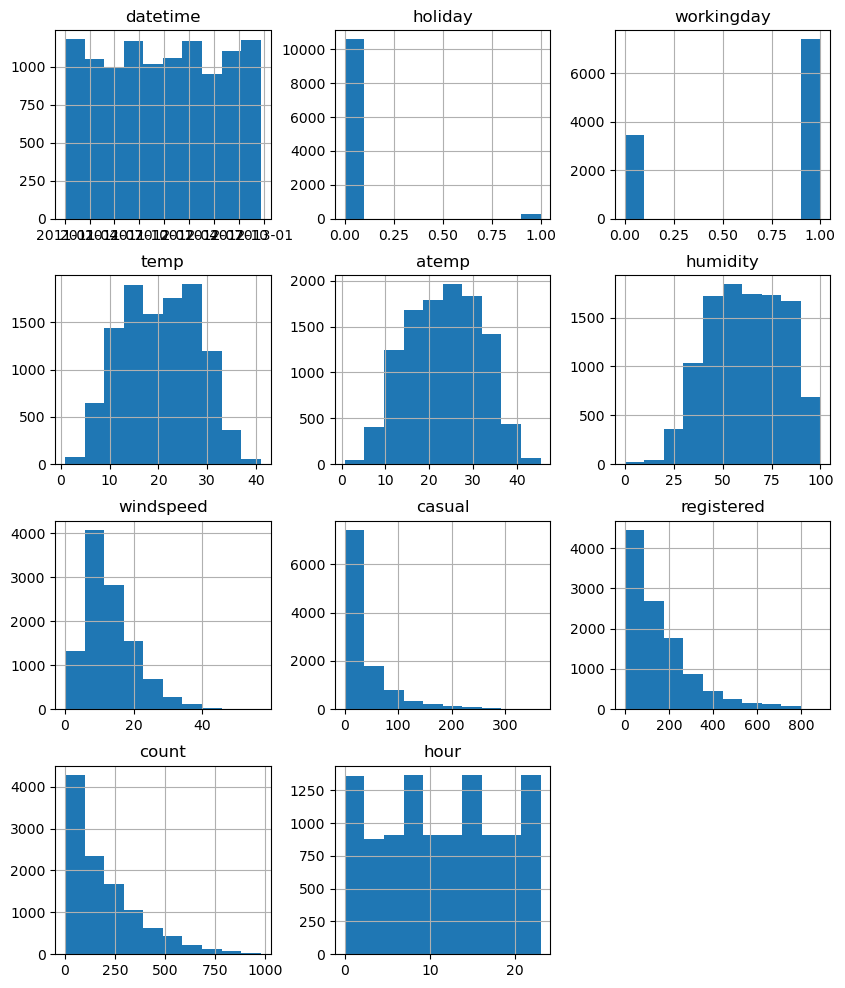

In [19]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10,12))
plt.show()

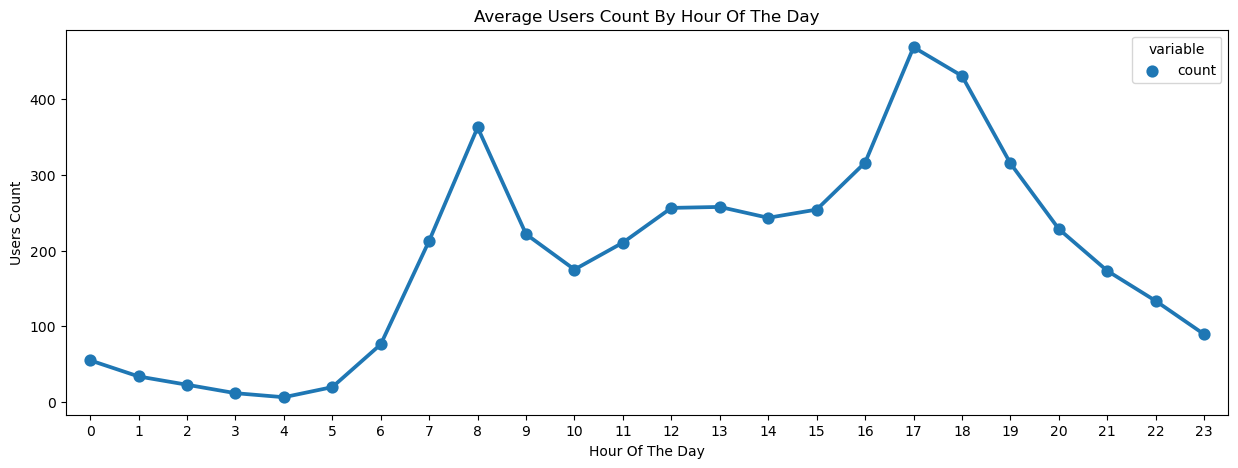

In [124]:
fig,ax= plt.subplots(nrows=1,figsize = (15,5))
hourTransformed = pd.melt(train[["hour","count"]], id_vars=['hour'], value_vars=['count'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["count"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day",label='big')
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [65]:
predictor_new_features = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(    
    train_data = train.loc[:,~train.columns.isin(['casual','registered'])], 
    time_limit = 600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231128_055840/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231128_055840/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sun Oct 22 17:17:17 UTC 2023
Disk Space Avail:   9223372018.36 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem

In [67]:
#predictor_new_features.fit_summary()
leaderboard_new_features = predictor_new_features.leaderboard(silent=True,extra_info=True)

In [70]:
leaderboard_new_features[['model','score_val','child_hyperparameters']].head(5)

,model,score_val,child_hyperparameters
0,WeightedEnsemble_L3,-30.245576,{'ensemble_size': 100}
1,LightGBM_BAG_L2,-30.636764,{'learning_rate': 0.05}
2,LightGBMXT_BAG_L2,-30.738574,"{'learning_rate': 0.05, 'extra_trees': True}"
3,CatBoost_BAG_L2,-31.412950,"{'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'RMSE'}"
4,RandomForestMSE_BAG_L2,-31.695891,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}"


In [71]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)

In [72]:
predictions_new_features[predictions_new_features<0] = 0

In [73]:
submission_new_features = submission .copy()

In [74]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [272]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 257kB/s]
Successfully submitted to Bike Sharing Demand

In [83]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-11-26 05:34:34  new features          complete  0.69288      0.69288       
submission.csv               2023-11-26 04:34:27  first raw submission  complete  1.79937      1.79937       


#### New Score of `0.69288`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [20]:
from autogluon.common import space
from ray import tune
import autogluon.core as ag

In [34]:
hyperparameters = {
    'GBM': {
        'num_boost_round': ag.space.Int(300, 1000),
        'num_leaves':  ag.space.Int(30, 100),
    },
    'RF':{
        'min_samples_split': ag.space.Int(2, 10),
        'n_estimators':  ag.space.Int(100, 1000),
    },
}
hyperparameter_tune_kwargs = {
    "searcher": "bayes", # random
    "scheduler": "local",
    "num_trials": 20,
}

In [35]:
predictor_new_hpo = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(
    train_data= train.loc[:,~train.columns.isin(['casual','registered'])], 
    time_limit=1200,
    refit_full=True,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20231128_032046/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20231128_032046/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sun Oct 22 17:17:17 UTC 2023
Disk Space Avail:   9223372025.85 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify proble

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-36.4299	 = Validation score   (-root_mean_squared_error)
	27.3

  0%|          | 0/20 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: RandomForest_BAG_L1/T1 ...
	-39.1863	 = Validation score   (-root_mean_squared_error)
	6.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L1/T2 ...
	-39.384	 = Validation score   (-root_mean_squared_error)
	12.77s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L1/T3 ...
	-38.9508	 = Validation score   (-root_mean_squared_error)
	32.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L1/T4 ...
	-38.9865	 = Validation score   (-root_mean_squared_error)
	20.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L1/T5 ...
	-39.0386	 = Validation score   (-root_mean_squared_error)
	18.5s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L1/T6 ...
	-38.879	 = Validation score   (-root_mean_squared_error)
	32.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: Ran

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-33.3355	 = Validation score   (-root_mean_squared_error)
	34.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-33.5091	 = Validation score   (-root_mean_squared_error)
	35.54s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-33.3507	 = Validation score   (-root_mean_squared_error)
	40.15s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-33.495	 = Validation score   (

  0%|          | 0/20 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: RandomForest_BAG_L2/T1 ...
	-33.6315	 = Validation score   (-root_mean_squared_error)
	27.23s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L2/T2 ...
	-33.4667	 = Validation score   (-root_mean_squared_error)
	67.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: RandomForest_BAG_L2/T3 ...
	-33.3234	 = Validation score   (-root_mean_squared_error)
	125.35s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 82.05s of remaining time.
	-33.0426	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1118.75s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.ref

In [196]:
#predictor_new_hpo.fit_summary()

In [55]:
#all_models_info = predictor_new_hpo.info()
#best_model = predictor_new_hpo.get_model_best()
#all_models_info['model_info'][best_model]#['hyperparameters']

In [56]:
leaderboard_new_hpo = predictor_new_hpo.leaderboard(silent=True,extra_info=True)

In [63]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

In [77]:
leaderboard_new_hpo.shape

(72, 30)

In [81]:
leaderboard_new_hpo[['model','score_val','child_hyperparameters']].head(10)

,model,score_val,child_hyperparameters
0,WeightedEnsemble_L2,-32.745320,{'ensemble_size': 100}
1,WeightedEnsemble_L3,-33.042600,{'ensemble_size': 100}
2,RandomForest_BAG_L2/T3,-33.323395,"{'n_estimators': 863, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'min_samples_split': 5}"
3,LightGBM_BAG_L2/T1,-33.335453,"{'learning_rate': 0.05, 'num_boost_round': 300, 'num_leaves': 30, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}"
4,LightGBM_BAG_L2/T3,-33.350708,"{'learning_rate': 0.020642987946863926, 'num_boost_round': 370, 'num_leaves': 42, 'feature_fraction': 0.9058909241964931, 'min_data_in_leaf': 25}"
5,LightGBM_BAG_L1/T7,-33.447996,"{'learning_rate': 0.08900708329715348, 'num_boost_round': 723, 'num_leaves': 62, 'feature_fraction': 0.865369840563233, 'min_data_in_leaf': 16}"
6,RandomForest_BAG_L2/T2,-33.466743,"{'n_estimators': 292, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'min_samples_split': 7}"
7,LightGBM_BAG_L2/T4,-33.494999,"{'learning_rate': 0.09276005809908329, 'num_boost_round': 474, 'num_leaves': 67, 'feature_fraction': 0.8458603797064445, 'min_data_in_leaf': 25}"
8,LightGBM_BAG_L2/T2,-33.509074,"{'learning_rate': 0.06994332504138302, 'num_boost_round': 659, 'num_leaves': 39, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5}"
9,LightGBM_BAG_L1/T4,-33.519214,"{'learning_rate': 0.09276005809908329, 'num_boost_round': 474, 'num_leaves': 67, 'feature_fraction': 0.8458603797064445, 'min_data_in_leaf': 25}"


In [227]:
best_model_details = leaderboard[leaderboard['model'] == best_model]
best_model_details

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
1,WeightedEnsemble_L2,-31.841309,6.546588,282.962642,0.00105,0.264286,2,True,3


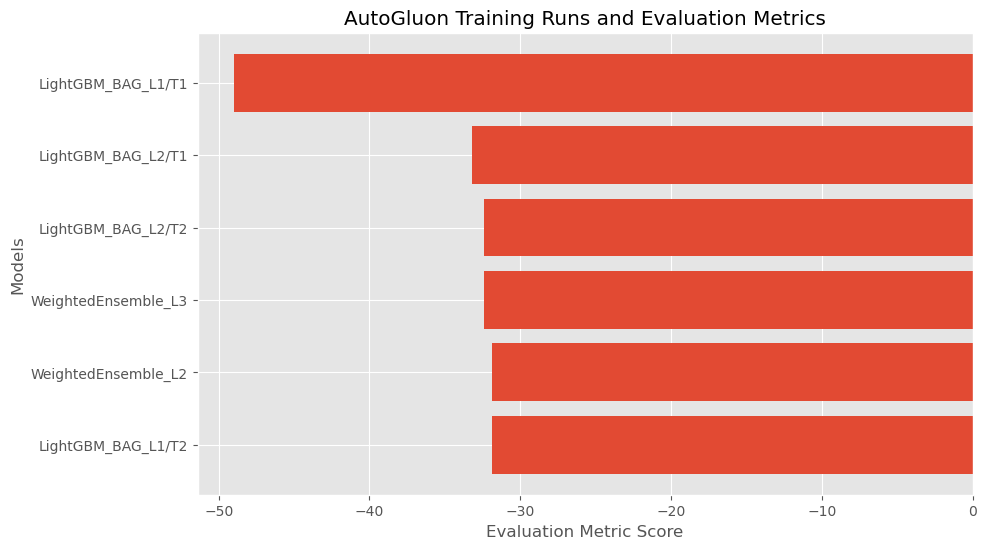

In [228]:
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

# Create a bar chart
plt.barh(leaderboard['model'], leaderboard['score_val'])

# Add labels and title
plt.xlabel('Evaluation Metric Score')
plt.ylabel('Models')
plt.title('AutoGluon Training Runs and Evaluation Metrics')

# Show the plot
plt.show()

In [28]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [91]:
# comparing predictions
#predictions_new_hpo1 = predictor_new_hpo.predict(test,model = 'LightGBM_BAG_L2/T1')
#predictions_new_hpo2 = predictor_new_hpo.predict(test,model = 'LightGBM_BAG_L2/T4')
#predictions_new_hpo1[predictions_new_hpo1<0] = 0
#predictions_new_hpo2[predictions_new_hpo2<0] = 0

In [29]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0

In [84]:
submission_new_hpo = submission.copy()

In [88]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [89]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters learning_rate = 0.0206, num_boost_round=370, min_data_in_leaf = 25"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

In [90]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                                                           status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-11-28 06:34:25  new features with hyperparameters learning_rate = 0.0206, num_boost_round=370, min_data_in_leaf = 25  complete  0.52244      0.52244       
submission_new_hpo.csv       2023-11-28 06:33:28  new features with hyperparameters learning_rate = 0.05, num_boost_round=300, min_data_in_leaf = 20    complete  0.51228      0.51228       
submission_new_hpo.csv       2023-11-28 03:18:26  new features with hyperparameters RF, GBM                                                             complete  0.56852      0.56852       
submission_new_features.csv  2023-11-27 07:51:44  

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

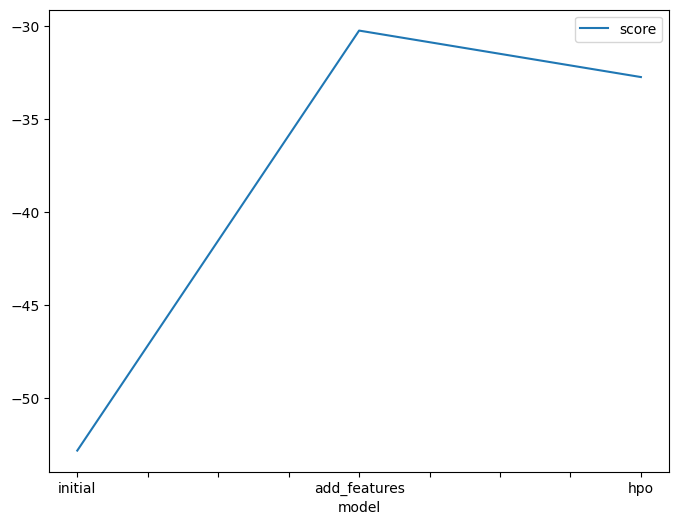

In [100]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.832456, -30.245576, -32.745320]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

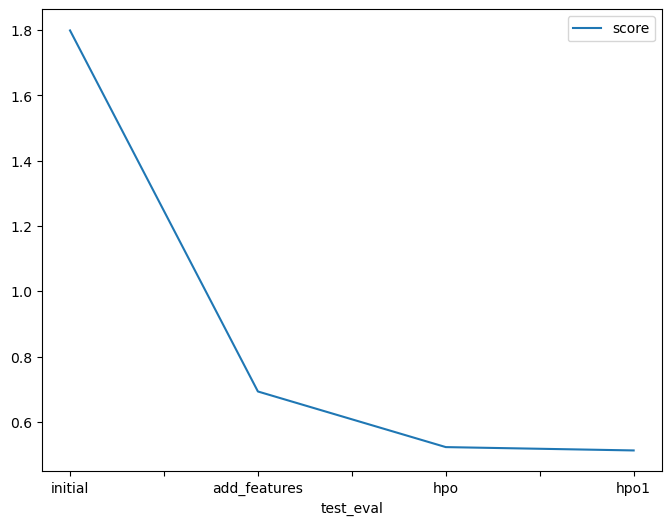

In [98]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo","hpo1"],
        "score": [1.79937, 0.69288, 0.52244,0.5122]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [96]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo","hpo1"],
    "learning_rate": ['default', 'default', 0.05,0.021],
    "num_boost_round": ['default', 'default', 300,370],
    "num_leaves": ['default', 'default', 30,42],
    "min_data_in_leaf": ['default', 'default', 20,25],
    "score": [1.79937, 0.6928, 0.52244,0.5122]
})

,model,learning_rate,num_boost_round,num_leaves,min_data_in_leaf,score
0,initial,default,default,default,default,1.79937
1,add_features,default,default,default,default,0.69280
2,hpo,0.05,300,30,20,0.52244
3,hpo1,0.021,370,42,25,0.51220
